Analyse d'impact des précipitations (Rain)
Problème : Prédire les précipitations nécessaires pour une production optimale d'une culture.
Approche : Inverser la relation entre "Rain" et "Production" via des modèles de régression ou d'optimisation.
Applications : Aider à planifier les besoins en irrigation.

In [2]:
# Importer les bibliothèques nécessaires
import pandas as pd  # Pour la manipulation des données
import matplotlib.pyplot as plt  # Pour les graphiques
import seaborn as sns  # Pour des visualisations élégantes

In [18]:
# Charger le fichier CSV dans un DataFrame
data = pd.read_csv("dataset.csv")  # Charger le fichier
# Afficher les premières lignes pour un aperçu
data 

,State,Year,Crop,Area,Rain,Production
0,11,2000,64,1254.0,2763.2,2000.0
1,11,2000,71,2.0,2763.2,1.0
2,11,2000,39,102.0,2763.2,321.0
3,11,2000,99,176.0,2763.2,641.0
4,11,2000,102,720.0,2763.2,165.0
...,...,...,...,...,...,...
76098,3,2014,12,26.0,1287.4,172.0
76099,3,2014,48,5346.0,1287.4,4630.0
76100,3,2014,39,9919.0,1287.4,16499.0
76101,3,2014,103,3.0,1287.4,3.0


State : Identifiant de l'état.
Year : Année de l'observation.
Crop : Identifiant de la culture.
Area : Superficie cultivée .
Rain : Précipitations .
Production : Production totale .

In [16]:
# Étape 1 : Analyse exploratoire des données (EDA)
# Afficher des informations générales sur le dataset
print(data.info())  # Vérifier les types de colonnes et les valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76103 entries, 0 to 76102
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       76103 non-null  int64  
 1   Year        76103 non-null  int64  
 2   Crop        76103 non-null  int64  
 3   Area        76103 non-null  float64
 4   Rain        76103 non-null  float64
 5   Production  76103 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 3.5 MB
None


In [21]:
# Étape 2 : Statistiques descriptives
# Résumer les colonnes clés pour comprendre leur distribution
print(data[['Rain', 'Production', 'Area']].describe())

               Rain    Production           Area
count  76103.000000  7.610300e+04   76103.000000
mean    1294.062911  1.472614e+06    8240.822277
std      563.823636  2.874284e+07   29968.659002
min      274.700000  0.000000e+00       0.200000
25%      991.800000  5.700000e+01      63.000000
50%     1245.000000  4.990000e+02     450.000000
75%     1424.000000  4.000000e+03    2796.000000
max     3616.700000  1.250800e+09  687000.000000


Rain (Précipitations) :

Moyenne : 1294.06 mm
Minimum : 274.7 mm
Maximum : 3616.7 mm

Production :
Moyenne : 1 472 614 unités (probablement en kg ou tonnes, à confirmer).
Médiane : 499 unités (les données semblent très étendues avec un maximum de 1.25 milliard).
Grande variation entre les cultures (des valeurs très élevées nécessitent une analyse plus fine).

Area (Superficie cultivée) :
Moyenne : 8 240 unités
Médiane : 450 unités
Maximum : 687 000 unités

In [88]:
data.corr()

,State,Year,Crop,Area,Rain,Production
State,1.000000,-0.068139,-0.034452,0.001371,0.028158,0.046705
Year,-0.068139,1.000000,-0.022074,-0.002367,-0.000727,0.011002
Crop,-0.034452,-0.022074,1.000000,-0.081627,-0.063726,-0.020010
Area,0.001371,-0.002367,-0.081627,1.000000,-0.068424,0.116940
Rain,0.028158,-0.000727,-0.063726,-0.068424,1.000000,0.122665
Production,0.046705,0.011002,-0.020010,0.116940,0.122665,1.000000


In [25]:
# Étape 3 : Visualisations
sns.set(style="whitegrid")  # Définir le style des graphiques

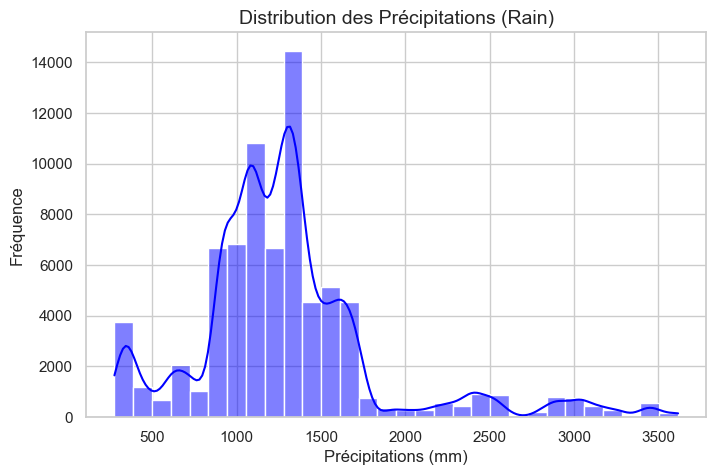

In [27]:
# 1. Distribution des précipitations
plt.figure(figsize=(8, 5))
sns.histplot(data['Rain'], kde=True, bins=30, color='blue')  # Tracer un histogramme avec une courbe KDE
plt.title('Distribution des Précipitations (Rain)', fontsize=14)  # Titre du graphique
plt.xlabel('Précipitations (mm)', fontsize=12)  # Étiquette de l'axe X
plt.ylabel('Fréquence', fontsize=12)  # Étiquette de l'axe Y
plt.show()  # Afficher le graphique


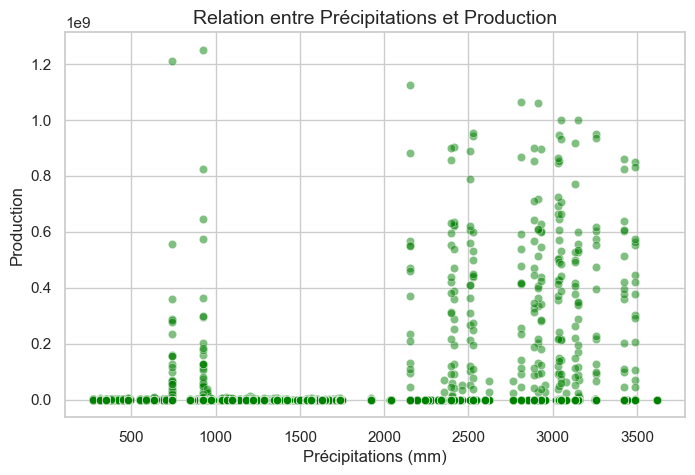

In [29]:
# 2. Relation entre Rain (Précipitations) et Production
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Rain', y='Production', data=data, alpha=0.5, color='green')  # Nuage de points
plt.title('Relation entre Précipitations et Production', fontsize=14)
plt.xlabel('Précipitations (mm)', fontsize=12)
plt.ylabel('Production', fontsize=12)
plt.show()

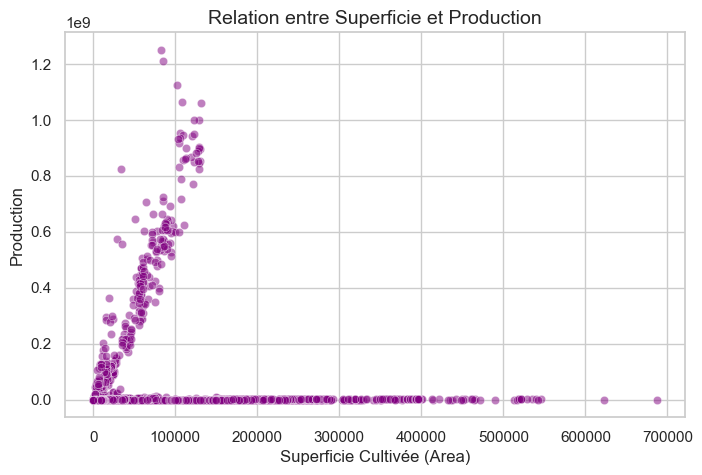

In [31]:
# 3. Relation entre Area (Superficie cultivée) et Production
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Area', y='Production', data=data, alpha=0.5, color='purple')  # Nuage de points
plt.title('Relation entre Superficie et Production', fontsize=14)
plt.xlabel('Superficie Cultivée (Area)', fontsize=12)
plt.ylabel('Production', fontsize=12)
plt.show()

In [33]:
# Étape 4 : Détection et gestion des outliers (valeurs extrêmes)

# Pour détecter les outliers, on utilise la méthode IQR (Interquartile Range)
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)  # Premier quartile (25%)
    Q3 = df[col].quantile(0.75)  # Troisième quartile (75%)
    IQR = Q3 - Q1  # Intervalle interquartile
    lower_bound = Q1 - 1.5 * IQR  # Limite inférieure
    upper_bound = Q3 + 1.5 * IQR  # Limite supérieure
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

In [35]:
# Détecter les outliers dans les colonnes clés
outliers_rain = detect_outliers(data, 'Rain')
outliers_production = detect_outliers(data, 'Production')
outliers_area = detect_outliers(data, 'Area')

In [37]:
# Compter les outliers détectés
print(f"Outliers détectés dans 'Rain' : {len(outliers_rain)}")
print(f"Outliers détectés dans 'Production' : {len(outliers_production)}")
print(f"Outliers détectés dans 'Area' : {len(outliers_area)}")

Outliers détectés dans 'Rain' : 7936
Outliers détectés dans 'Production' : 13417
Outliers détectés dans 'Area' : 11819


In [39]:
# Supprimer les outliers
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [41]:
# Appliquer la suppression des outliers
data_cleaned = data.copy()
data_cleaned = remove_outliers(data_cleaned, 'Rain')
data_cleaned = remove_outliers(data_cleaned, 'Production')
data_cleaned = remove_outliers(data_cleaned, 'Area')

print(f"Taille des données après suppression des outliers : {data_cleaned.shape}")

Taille des données après suppression des outliers : (49101, 6)


In [43]:
# Étape 5 : Normalisation des données (échelle uniforme entre 0 et 1)
from sklearn.preprocessing import MinMaxScaler

# Initialiser le scaler
scaler = MinMaxScaler()

# Colonnes à normaliser
cols_to_normalize = ['Rain', 'Production', 'Area']

# Appliquer la normalisation
data_cleaned[cols_to_normalize] = scaler.fit_transform(data_cleaned[cols_to_normalize])

# Vérifier les résultats de la normalisation
print(data_cleaned[cols_to_normalize].describe())

               Rain    Production          Area
count  49101.000000  49101.000000  49101.000000
mean       0.501703      0.070010      0.168807
std        0.185664      0.137490      0.228595
min        0.000000      0.000000      0.000000
25%        0.403624      0.002594      0.011121
50%        0.514105      0.015780      0.061211
75%        0.607236      0.068093      0.238481
max        1.000000      1.000000      1.000000


In [45]:
# Étape 6 : Encodage des variables catégoriques
# Encoder les colonnes 'State' et 'Crop' comme des variables numériques
data_cleaned['State'] = data_cleaned['State'].astype('category').cat.codes
data_cleaned['Crop'] = data_cleaned['Crop'].astype('category').cat.codes

In [73]:
# Étape 7 : Préparation pour la modélisation (séparer les variables)
# Variables indépendantes (features)
X = data_cleaned[['Rain', 'Area']]

# Variable dépendante (target)
y = data_cleaned['Production']

In [49]:
# Étape 8 : Modélisation avec une régression linéaire
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
# Prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Mean Squared Error) : {mse}")
print(f"R2 Score : {r2}")

MSE (Mean Squared Error) : 0.014111910756133174
R2 Score : 0.2144456373388034


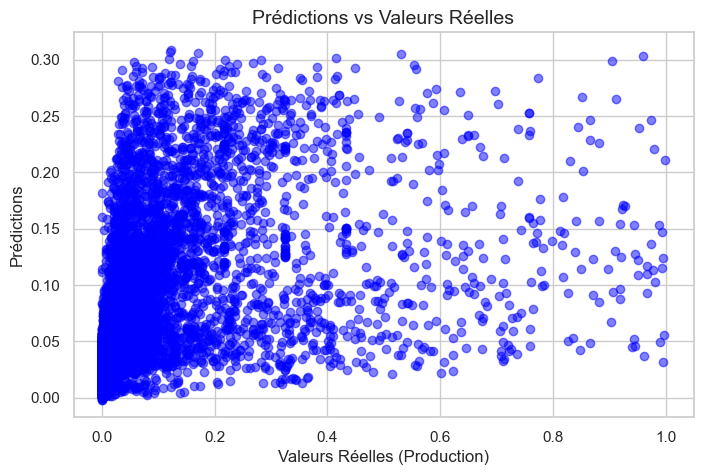

In [92]:
# Étape 9 : Visualisation des prédictions
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.title('Prédictions vs Valeurs Réelles', fontsize=14)
plt.xlabel('Valeurs Réelles (Production)', fontsize=12)
plt.ylabel('Prédictions', fontsize=12)
plt.show()



In [94]:
data.corr()

,State,Year,Crop,Area,Rain,Production
State,1.000000,-0.068139,-0.034452,0.001371,0.028158,0.046705
Year,-0.068139,1.000000,-0.022074,-0.002367,-0.000727,0.011002
Crop,-0.034452,-0.022074,1.000000,-0.081627,-0.063726,-0.020010
Area,0.001371,-0.002367,-0.081627,1.000000,-0.068424,0.116940
Rain,0.028158,-0.000727,-0.063726,-0.068424,1.000000,0.122665
Production,0.046705,0.011002,-0.020010,0.116940,0.122665,1.000000


In [90]:
from sklearn.ensemble import RandomForestRegressor

# Initialiser le modèle
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner le modèle
rf_model.fit(X_train, y_train)

# Prédictions et évaluation
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f"MSE (Random Forest) : {rf_mse}")
print(f"R2 Score (Random Forest) : {rf_r2}")

MSE (Random Forest) : 0.0027069054019391472
R2 Score (Random Forest) : 0.8493172622367744


Performances du modèle
MSE (Mean Squared Error) : 0.0027

Cela signifie que l'erreur moyenne des prédictions du modèle est très faible. Random Forest est capable de modéliser avec précision les relations complexes entre les variables.
R² Score : 0.849

Un score R² de 84.9% indique que le modèle explique presque 85% de la variance des données. Cela montre que Random Forest est beaucoup plus performant que la régression linéaire (qui expliquait seulement 21% de la variance).


 Pourquoi Random Forest est meilleur que la régression linéaire
Modélisation de relations non linéaires :

La régression linéaire suppose que les relations entre les variables sont strictement linéaires. Cependant, dans des domaines comme l'agriculture, les relations entre les précipitations, la superficie, et la production sont souvent complexes et non linéaires.
Random Forest, basé sur des arbres de décision, peut capturer ces relations non linéaires sans nécessiter de transformation manuelle des données.
Gestion des interactions entre les variables :

Random Forest identifie automatiquement les interactions entre les variables, par exemple :
Précipitations x Superficie.
Type de culture x Région.
Ces interactions sont difficiles à modéliser avec une régression linéaire standard.
Robustesse aux valeurs aberrantes :

Les arbres de décision, utilisés dans Random Forest, sont moins sensibles aux outliers (valeurs aberrantes). Cela permet au modèle de rester performant même si certaines données sont extrêmes ou inhabituelles.
Flexibilité :

Random Forest peut diviser l’espace des variables en régions complexes, ce qui permet une meilleure adaptation aux motifs des données.

In [85]:
rf_train_r2 = rf_model.score(X_train, y_train)
print(f"R2 Score (Random Forest - Training Set): {rf_train_r2}")


R2 Score (Random Forest - Training Set): 0.976333004255116


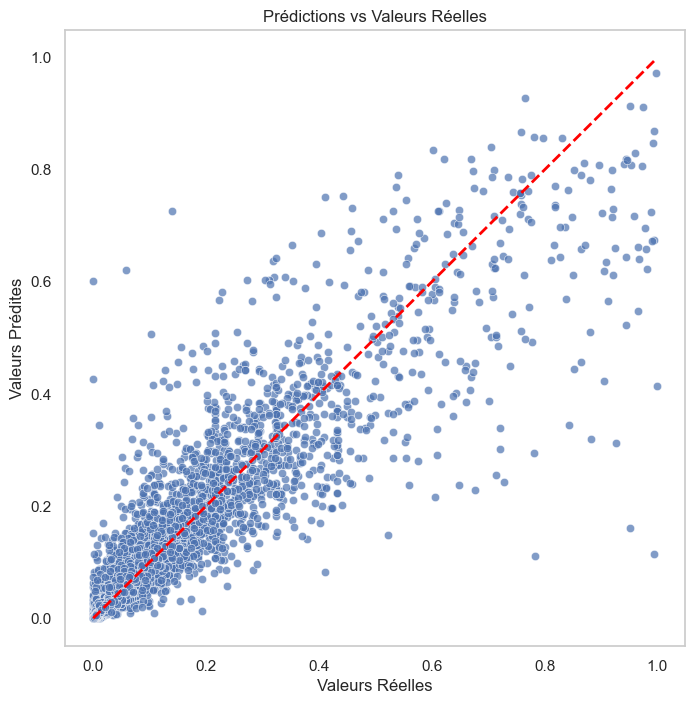

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=rf_y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.title("Prédictions vs Valeurs Réelles")
plt.grid()
plt.show()
